Διανυσματοποίηση Εγγράφων/κειμένων (Vectorization)

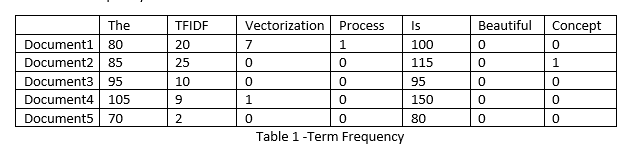

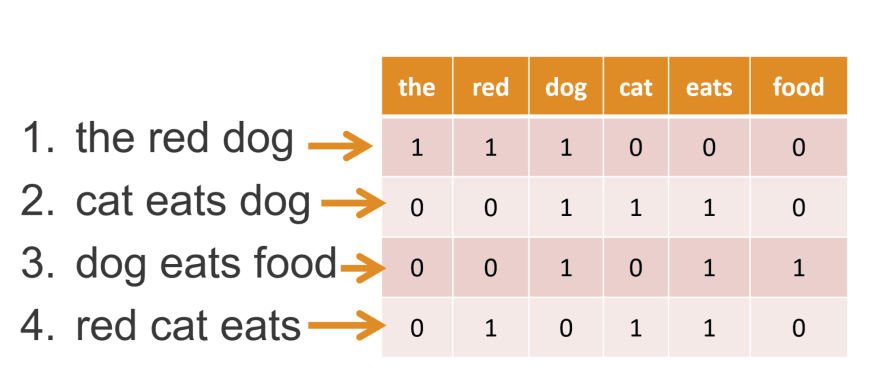

In [0]:
import pandas as pd
import numpy as np 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
full_tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/TsiprasTweets080419.tsv", sep='\t')

In [0]:
full_tweets_df.head()

Ας φτιάξουμε ένα μικρότερο dataframe...

In [0]:
short_tweets = full_tweets_df[['created_at','full_text' ]]


In [0]:
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [0]:
short_tweets.head()

In [0]:
short_tweets.tail()

In [0]:
short_tweets.dtypes

Ας μετατρέψουμε το string της ημερομηνίας σε datetime 

In [0]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')


In [0]:
short_tweets.dtypes

In [0]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day


In [0]:
short_tweets.head()

In [0]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [0]:
short_tweets['year'].value_counts().plot(kind='bar')

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [0]:
short_tweets[short_tweets['year']==2020]['text']

In [0]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
#text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')


In [0]:
text = short_tweets[short_tweets['year']==2020]['text'].str.cat(sep = ' ').replace("amp", ' ')


In [0]:
text

In [0]:
list(STOPWORDS)[0:20]

In [0]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας ψάξουμε τα Ελληνικά stopwords.....

In [0]:
import spacy

In [0]:
#!python -m spacy download el_core_news_sm

# Επειτα κάνουμε Runtime ->  Restart Runtime, για να δει τις αλλαγές από το download...

In [0]:
nlp = spacy.load('el_core_news_sm')

In [0]:
list(nlp.Defaults.stop_words)[0:20]

In [0]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας βρούμε για καθε λέξη που βρίσκεται σε διαφορετικές πτώσεις στην ονομαστική, και τα ρήματα στο 1ο πρόσωπο...

In [0]:
short_tweets['text'][1]

In [0]:
doc = nlp(short_tweets['text'][1])

In [0]:
for token in doc:
    print(token.text, "----", token.lemma_, "----",token.pos_)

In [0]:
' '.join(token.lemma_ for token in doc)

In [0]:
text

In [0]:
full_doc = nlp(text)

In [0]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [0]:
clear_text[100:400]

In [0]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Vectorization starts here......

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [0]:
count_vector = cv.fit_transform(short_tweets['text'])

In [0]:
count_vector.shape

In [0]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


In [0]:
#cv.vocabulary_

In [0]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [0]:
count_vector = cv.fit_transform(short_tweets['text'])

In [0]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


In [0]:
#from html import unescape
#def my_tokenizer(doc):
            
#    # apply the preprocessing and tokenzation steps
#    doc_clean = unescape(doc).lower()
#    tokens = nlp(doc_clean)
#    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
#            
#    # use CountVectorizer's _word_ngrams built in method
#    # to remove stop words and extract n-grams
#    return(lemmatized_tokens)

In [0]:
# cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
# count_vector = cv.fit_transform(short_tweets['text'])
# results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
# results.head()


In [0]:
short_tweets['text'] = short_tweets['text'].str.replace("amp", " ")

In [0]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) 
 count_vector = cv.fit_transform(short_tweets['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()




In [0]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, 
                     token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


In [0]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, 
                     ngram_range=(2, 2) )  
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

In [0]:
results.sum(axis =0).sort_values(ascending = False)

In [0]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   


In [0]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20,  
                     token_pattern = '\\bcov[a-z0-9-_]*\\b')  
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

In [0]:
results.sum(axis =0).sort_values(ascending = False)

In [0]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20,  
                     vocabulary = ['covid19', 'κυβέρνηση'])  
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


In [0]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20,  
                     vocabulary = ['ωραίο', 'ευτυχώς','κακό', 'δυστυχώς', 'τυχεροί', 'άτυχοι'])  
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


In [0]:
results.sum(axis =0).sort_values(ascending = False)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_tweets['text'])  #finds the tfidf score with normalization


In [0]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), 
                       columns=tfidf_vectorizer.get_feature_names()) 
results.head()

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

In [0]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

In [0]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [0]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [0]:
short_tweets['text'].loc[3]

In [0]:
short_tweets['text'].loc[2823]